Implementing the technical indicators (SMA,EMA,MACD, RSI and Bollinger Bands) from scratch in Python. Use the yfinance library(https://pypi.org/project/yfinance/)  for getting stock data.

In [30]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4556    0  4556    0     0   8951      0 --:--:-- --:--:-- --:--:--  8968
100  517k  100  517k    0     0   645k      0 --:--:-- --:--:-- --:--:-- 6708k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4572    0  4572    0     0  19464      0 --:--:-- --:--:-- --:--:-- 19538
100  392k  100  392k    0     0   804k      0 --:--:-- --:--:-- --:--:--  804k


In [31]:

!pip install ta

In [32]:
%pip install pandas_ta

In [33]:
!pip install backtesting

In [34]:
#importing needed library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf

import ta

In [35]:
from backtesting import Backtest,Strategy
from backtesting.lib import crossover

**Getting Stockes Data**


---



In [36]:
df=yf.Ticker('RELIANCE.NS')
df=df.history(period="12mo")
df=df[['Open','High','Low','Close','Volume']]
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-25 00:00:00+05:30,2403.957983,2406.200063,2371.622258,2374.163330,5715684
2023-01-27 00:00:00+05:30,2376.006747,2378.946557,2303.512829,2329.122559,11920991
2023-01-30 00:00:00+05:30,2323.492292,2363.550738,2292.900405,2351.443604,10047822
2023-01-31 00:00:00+05:30,2373.615267,2379.245281,2332.759588,2345.564453,10472167
2023-02-01 00:00:00+05:30,2371.572401,2371.572401,2296.886277,2331.663330,8929007


Simple moving average

<Axes: xlabel='Date'>

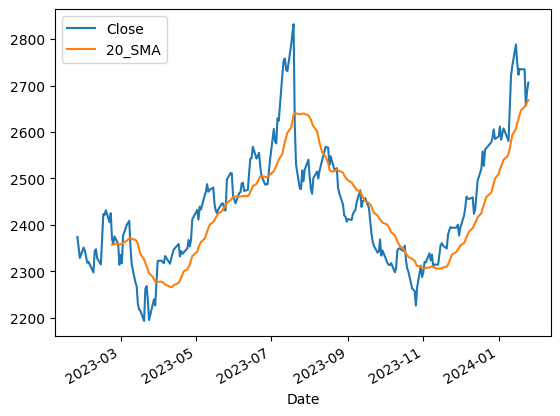

In [37]:
#coding simple moving avg

df['20_SMA']=df['Close'].rolling(20).mean()
df[['Close','20_SMA']].plot()

<Axes: xlabel='Date'>

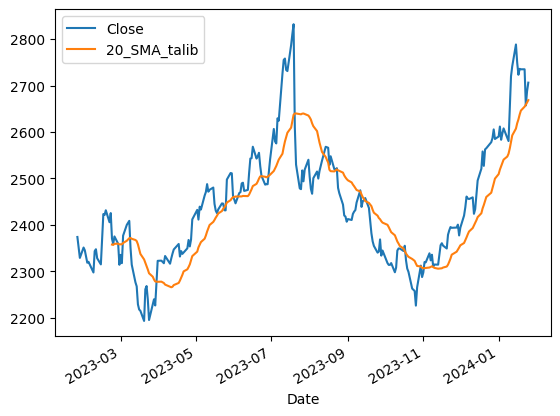

In [38]:
#SMA using ta lib
df['20_SMA_talib']=talib.SMA(df['Close'],timeperiod=20)
df[['Close','20_SMA_talib']].plot()

**Exponential Moving average**

<Axes: xlabel='Date'>

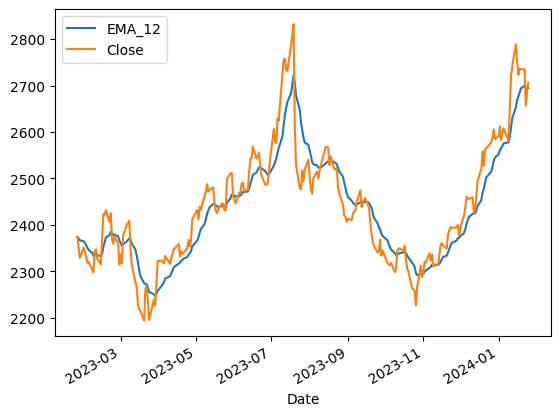

In [39]:
#coding EMA
# df['EMA']=df['Close'].ewm(com=0.6).mean()
# df.tail()
df['EMA_12']=df['Close'].ewm(span=12,adjust=False).mean()
df[['EMA_12','Close']].plot()


<Axes: xlabel='Date'>

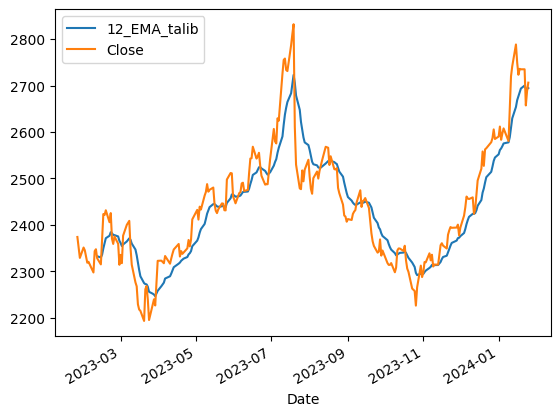

In [40]:
#EMA using talib
df['12_EMA_talib']=talib.EMA(df['Close'],timeperiod=12)
df[['12_EMA_talib','Close']].plot()

**Moving average convergence divergence**

<Axes: xlabel='Date'>

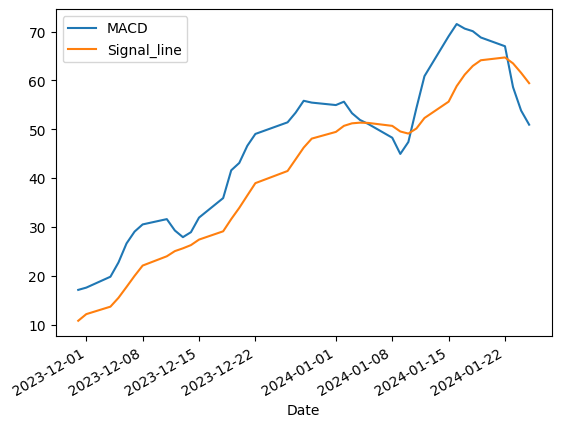

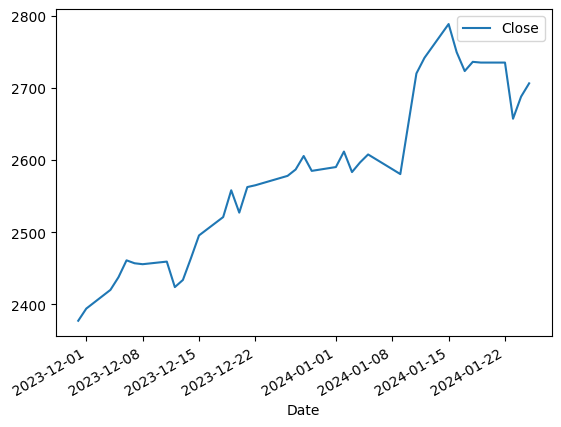

In [41]:
#coding MACD
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA_12'] - df['EMA_26']
df['Signal_line'] = df['MACD'].ewm(span=9, adjust=False).mean()
df[['MACD','Signal_line']][-40:].plot()
df[['Close']][-40:].plot()

<Axes: xlabel='Date'>

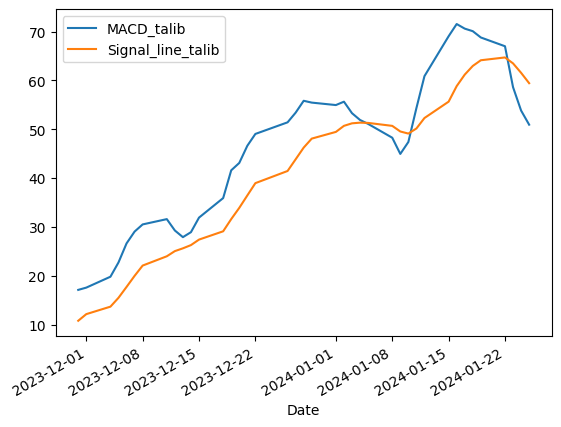

In [42]:
#MACD using talib
macd, signal, _ = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df1 = pd.DataFrame({

    'MACD_talib': macd,
    'Signal_line_talib': signal,
})
df1[['MACD_talib','Signal_line_talib']][-40:].plot()

**Bollinger Bands**

In [43]:
#coding Bollinger Bands
sigma=df['Close'].rolling(20).std()
df['upper_band']=df['20_SMA']+2*sigma
df['lower_band']=df['20_SMA']-2*sigma
df

,Open,High,Low,Close,Volume,20_SMA,20_SMA_talib,EMA_12,12_EMA_talib,EMA_26,MACD,Signal_line,upper_band,lower_band
Date,,,,,,,,,,,,,,
2023-01-25 00:00:00+05:30,2403.957983,2406.200063,2371.622258,2374.163330,5715684,NaN,NaN,2374.163330,NaN,2374.163330,0.000000,0.000000,NaN,NaN
2023-01-27 00:00:00+05:30,2376.006747,2378.946557,2303.512829,2329.122559,11920991,NaN,NaN,2367.233981,NaN,2370.826977,-3.592996,-0.718599,NaN,NaN
2023-01-30 00:00:00+05:30,2323.492292,2363.550738,2292.900405,2351.443604,10047822,NaN,NaN,2364.804692,NaN,2369.391171,-4.586479,-1.492175,NaN,NaN
2023-01-31 00:00:00+05:30,2373.615267,2379.245281,2332.759588,2345.564453,10472167,NaN,NaN,2361.844655,NaN,2367.626229,-5.781574,-2.350055,NaN,NaN
2023-02-01 00:00:00+05:30,2371.572401,2371.572401,2296.886277,2331.663330,8929007,NaN,NaN,2357.201374,NaN,2364.962311,-7.760936,-3.432231,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-19 00:00:00+05:30,2752.000000,2752.000000,2718.000000,2734.899902,5211352,2646.034998,2646.034998,2693.514407,2693.514407,2624.737251,68.777156,64.117253,2796.323968,2495.746027
2024-01-22 00:00:00+05:30,2734.899902,2734.899902,2734.899902,2734.899902,0,2654.527490,2654.527490,2699.881406,2699.881406,2632.897447,66.983959,64.690594,2804.743573,2504.311407
2024-01-23 00:00:00+05:30,2743.500000,2743.500000,2645.100098,2657.149902,10027710,2658.482483,2658.482483,2693.307329,2693.307329,2634.693925,58.613403,63.475156,2804.321889,2512.643077


<Axes: xlabel='Date'>

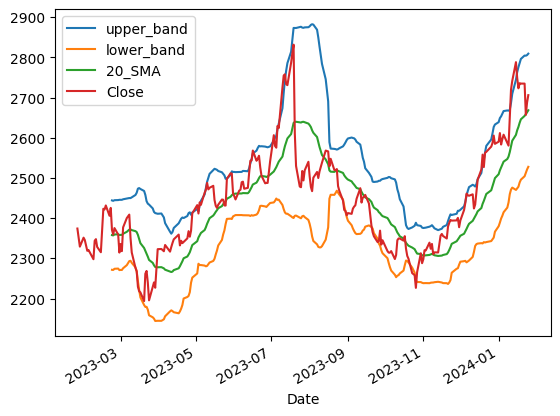

In [44]:
df[['upper_band','lower_band','20_SMA','Close']].plot()

<Axes: xlabel='Date'>

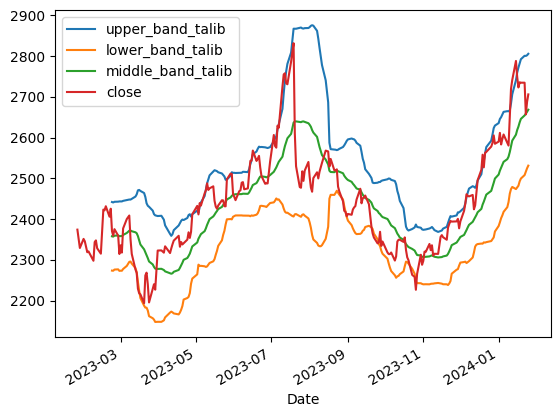

In [45]:
#bollinger bands using talib
upper_band, middle_band, lower_band = talib.BBANDS(df['Close'], timeperiod=20, nbdevup=2, nbdevdn=2)
df2 = pd.DataFrame({
    'close':df['Close'],
    'upper_band_talib':upper_band,
    'middle_band_talib':middle_band,
    'lower_band_talib':lower_band,
})
df2[['upper_band_talib','lower_band_talib','middle_band_talib','close']].plot()

**Relative strength index**

In [46]:
#coding RSI
df['gains']=(df['Close']-df['Open']).apply(lambda x:x if x>0 else 0)
df['losses']=(df['Close']-df['Open']).apply(lambda x:-x if x<0 else 0)
df['avg_gains']=df['gains'].rolling(14).mean()
df['avg_losses']=df['losses'].rolling(14).mean()

df['rs']=(df['avg_gains']/df['avg_losses'])
df['rsi']=100-(100/(df['rs']+1))
df.tail()


,Open,High,Low,Close,Volume,20_SMA,20_SMA_talib,EMA_12,12_EMA_talib,EMA_26,MACD,Signal_line,upper_band,lower_band,gains,losses,avg_gains,avg_losses,rs,rsi
Date,,,,,,,,,,,,,,,,,,,,
2024-01-19 00:00:00+05:30,2752.000000,2752.000000,2718.000000,2734.899902,5211352,2646.034998,2646.034998,2693.514407,2693.514407,2624.737251,68.777156,64.117253,2796.323968,2495.746027,0.000000,17.100098,19.371408,8.332136,2.324903,69.923935
2024-01-22 00:00:00+05:30,2734.899902,2734.899902,2734.899902,2734.899902,0,2654.527490,2654.527490,2699.881406,2699.881406,2632.897447,66.983959,64.690594,2804.743573,2504.311407,0.000000,0.000000,17.464268,8.332136,2.096013,67.700398
2024-01-23 00:00:00+05:30,2743.500000,2743.500000,2645.100098,2657.149902,10027710,2658.482483,2658.482483,2693.307329,2693.307329,2634.693925,58.613403,63.475156,2804.321889,2512.643077,0.000000,86.350098,17.464268,12.592861,1.386839,58.103581
2024-01-24 00:00:00+05:30,2670.449951,2699.000000,2647.850098,2687.750000,10959564,2663.527478,2663.527478,2692.452355,2692.452355,2638.624005,53.828350,61.545795,2805.872299,2521.182657,17.300049,0.000000,18.082136,12.592861,1.435904,58.947475
2024-01-25 00:00:00+05:30,2685.899902,2728.300049,2670.399902,2706.149902,5902076,2668.557471,2668.557471,2694.559670,2694.559670,2643.625923,50.933747,59.423385,2809.377625,2527.737316,20.250000,0.000000,19.185704,12.592861,1.523538,60.373098


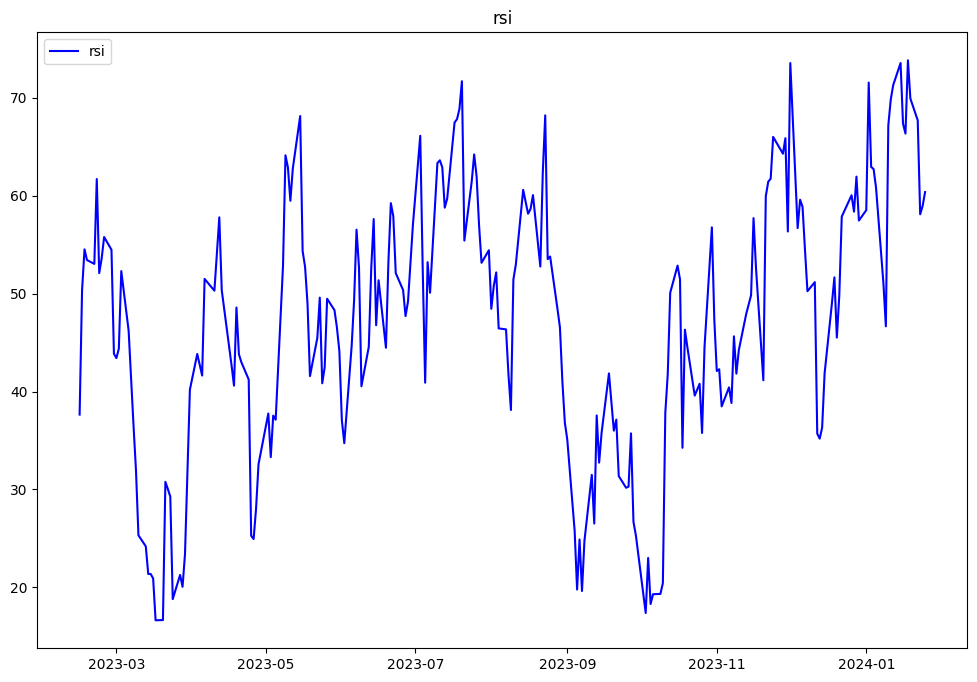

In [47]:
plt.figure(figsize=(12, 8))
plt.plot(df['rsi'], label='rsi', color='b')
plt.title('rsi')
plt.legend()
plt.show()

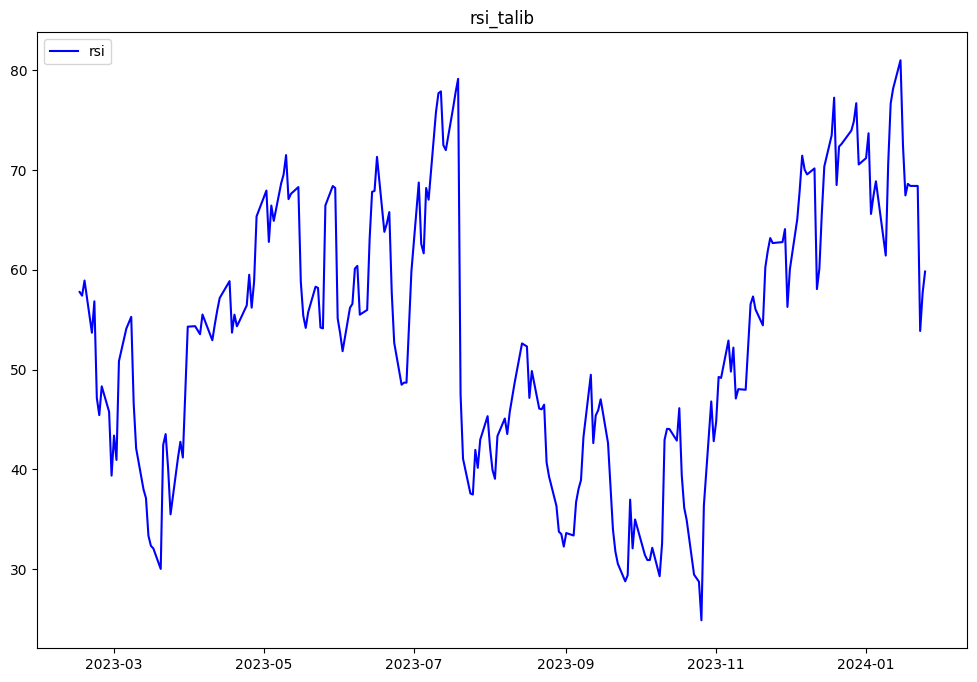

In [48]:
#rsi using talib
rsi_talib = talib.RSI(df['Close'], timeperiod=14)
df4=pd.DataFrame({
    'rsi_talib':rsi_talib,
})

plt.figure(figsize=(12, 8))
plt.plot(df4['rsi_talib'], label='rsi', color='b')
plt.title('rsi_talib')
plt.legend()
plt.show()

**Basic strategy implementation** : Combine EMA, and RSI to get a basic strategy on a single stock. Generate the trading signals (1 for long, -1 for short and 0 for exit) and calculate PnL, Portfolio value (use both compounding and non compounding approach), and plot the equity curve, drawdown chart and volatility chart. Also mention if your strategy is long only, short only or a combination of both (try making a combination of both). Benchmark is buy and hold return for the stock over the given time period.


In [49]:
def  Get_Signals(df):
  df['Signal']=0
  df.loc[(df['EMA_12']>df['EMA_26'])|(df['rsi']<40),'Signal']=1
  df.loc[(df['EMA_12']<df['EMA_26'])|(df['rsi']>70),'Signal']=-1
  return df

(Get_Signals(df))
print(df['Signal'])
print(df['Signal'].value_counts())

Date
2023-01-25 00:00:00+05:30    0
2023-01-27 00:00:00+05:30   -1
2023-01-30 00:00:00+05:30   -1
2023-01-31 00:00:00+05:30   -1
2023-02-01 00:00:00+05:30   -1
                            ..
2024-01-19 00:00:00+05:30    1
2024-01-22 00:00:00+05:30    1
2024-01-23 00:00:00+05:30    1
2024-01-24 00:00:00+05:30    1
2024-01-25 00:00:00+05:30    1
Name: Signal, Length: 247, dtype: int64
 1    127
-1    119
 0      1
Name: Signal, dtype: int64


**EMA crossover strategy**

In [50]:
class EMAcross(Strategy):
    n1 = 12
    n2 = 26

    def init(self):
        close = self.data.Close
        self.ema1 = self.I(ta.trend.ema_indicator, pd.Series(close), self.n1)
        self.ema2 = self.I(ta.trend.ema_indicator, pd.Series(close), self.n2)

    def next(self):
        if crossover(self.ema1, self.ema2):
            self.buy_price = self.data.Close[-1]
            self.buy()
        elif crossover(self.ema2, self.ema1):
            self.sell()
bt = Backtest(df, EMAcross, cash=100000, commission=0.002,exclusive_orders=True)
bt.run()

Start                     2023-01-25 00:00...
End                       2024-01-25 00:00...
Duration                    365 days 00:00:00
Exposure Time [%]                   88.663968
Equity Final [$]                122483.606348
Equity Peak [$]                 127089.360743
Return [%]                          22.483606
Buy & Hold Return [%]               13.983308
Return (Ann.) [%]                   22.987485
Volatility (Ann.) [%]               21.660445
Sharpe Ratio                         1.061266
Sortino Ratio                        1.793228
Calmar Ratio                          1.65326
Max. Drawdown [%]                  -13.904339
Avg. Drawdown [%]                   -3.364169
Max. Drawdown Duration      152 days 00:00:00
Avg. Drawdown Duration       25 days 00:00:00
# Trades                                    5
Win Rate [%]                             60.0
Best Trade [%]                      14.135904
Worst Trade [%]                     -3.501837
Avg. Trade [%]                    

In [51]:
optimunm=bt.optimize(n1=range(10,160,10),n2=range(10,160,10),constraint=lambda x:x.n2-x.n1>10, maximize='Return [%]')
optimunm

Backtest.optimize:   0%|          | 0/3 [00:00<?, ?it/s]

Start                     2023-01-25 00:00...
End                       2024-01-25 00:00...
Duration                    365 days 00:00:00
Exposure Time [%]                   87.449393
Equity Final [$]                127151.720359
Equity Peak [$]                 131962.174949
Return [%]                           27.15172
Buy & Hold Return [%]               13.983308
Return (Ann.) [%]                    27.77151
Volatility (Ann.) [%]               22.381069
Sharpe Ratio                         1.240848
Sortino Ratio                        2.197172
Calmar Ratio                         1.974553
Max. Drawdown [%]                  -14.064707
Avg. Drawdown [%]                   -3.354557
Max. Drawdown Duration      152 days 00:00:00
Avg. Drawdown Duration       27 days 00:00:00
# Trades                                    4
Win Rate [%]                             75.0
Best Trade [%]                      14.135904
Worst Trade [%]                     -1.232948
Avg. Trade [%]                    

In [52]:
bt.plot()

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


GridPlot(id='p1681', ...)

In [53]:
#long only function
# def backtest_Get_Signals(df,intial_fund):
#   funds=intial_fund
#   hold=0
#   df['Position']=0
#   df['PnL']=0

#   for index, row in df.iterrows():
#     if row['Signal']==1 and row['Position']==0:
#       boughts=funds//row['Close']
#       funds-=boughts*row['Close']
#       hold+=boughts
#       df.at[index,'Position']=hold
#     elif row['Signal']==-1 and row['Position']>0:
#       funds+=row['Close']*hold
#       hold=0
#       df.at[index,'Position']=0
#     df.at[index,'PnL']=funds+(hold*row['Close'])
#   return df



In [54]:
#long-short function

# def backtest_ls_Get_Signals(df,intial_fund):
#   funds=intial_fund
#   hold=0
#   df['Position']=0
#   df['PnL_ls']=0

#   for index, row in df.iterrows():
#     if row['Signal']==1 and row['Position']<0:
#       funds+=(-1*hold)*row['Close']
#       hold=0
#       df.at[index,'Position']=0
#     elif row['Signal']==1 and row['Position']==0:
#       boughts=funds//row['Close']
#       funds-=boughts*row['Close']
#       hold+=boughts
#       df.at[index,'Position']=hold
#     elif row['Signal']==-1 and row['Position']>0:
#       funds+=row['Close']*hold
#       hold=0
#       df.at[index,'Position']=0
#     elif row['Signal']==-1 and row['Position']==0:
#       sold=funds//row['Close']
#       funds-=sold*row['Close']
#       hold-=sold
#       df.at[index,'Position']=hold
#     df.at[index,'PnL_ls']=funds+(hold*row['Close'])
#   return df


In [55]:
# df=Get_Signals(df)
# df=backtest_Get_Signals(df,100000)

In [56]:
# plt.figure(figsize=(12, 8))
# plt.plot(df['PnL'], label='Portfolio Value', color='b')
# plt.title('Portfolio Value Over Time')
# plt.legend()
# plt.show()

# plt.figure(figsize=(12, 8))
# plt.plot(df['Close'], label='Close Price', alpha=0.5)
# plt.title('Equity Curve')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()
# plt.show()

In [57]:
#benchmark calculation
# initial=(100000/df['Close'][-90])*df['Close'][-90]
# final=(100000/df['Close'][-90])*df['Close'][-1]
# benchmark_PnL=final-initial
# print(benchmark_PnL)

In [58]:
# df=Get_Signals(df)
# df=backtest_ls_Get_Signals(df,100000)
# plt.figure(figsize=(12, 8))
# plt.plot(df['PnL_ls'], label='Portfolio Value', color='b')
# plt.title('Portfolio Value Over Time')
# plt.legend()
# plt.show()

# plt.figure(figsize=(12, 8))
# plt.plot(df['Close'], label='Close Price', alpha=0.5)
# plt.title('Equity Curve')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()
# plt.show()